# Análise de Empréstimo

**Nome:** Lucas Seiti Yamazaki <br>

___

Para este projeto exploraremos os dados de empréstimo que estão disponível publicamente em [LendingClub.com](www.lendingclub.com). O Lending Club conecta pessoas que precisam de dinheiro às pessoas que têm dinheiro (investidores). Um investidor deseja emprestar apenas para pessoas que tenham um perfil de alta probabilidade para pagá-lo. Vamos tentar criar um modelo que ajude a prever isso, tentando classificar e prever se o devedor pagará ou não o empréstimo na íntegra. Logo nossa variável alvo será **not.fully.paid**.

Dicionário de Dados:
* **not.fully.paid:** 1 se o cliente não pagou todo o empréstimo e 0 caso contrário, ou seja se o cliente pagou todo o empréstimo.
* **credit.policy:** 1 se o cliente atender aos critérios de subscrição de crédito de LendingClub.com e 0 caso contrário.
* **purpose:** A motivação para o empréstimo (recebe os valores "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" e "all_other").
* **int.rate:** A taxa de juros do empréstimo, como proporção (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados pela LendingClub.com como sendo mais arriscados recebem taxas de juros mais altas.
* **installment:** as parcelas mensais devidas pelo mutuário, se o empréstimo for financiado.
* **log.annual.inc:** O logaritmo natural da renda anual autorreferida do mutuário.
* **dti:** O rácio dívida / rendimento do mutuário (montante da dívida dividido pelo rendimento anual).
* **fico:** A pontuação de crédito FICO do mutuário.
* **days.with.cr.line:** O número de dias que o mutuário teve uma linha de crédito.
* **revol.bal:** o saldo rotativo do mutuário (valor não pago no final do ciclo de faturamento do cartão de crédito).
* **revol.util:** A taxa de utilização da linha de crédito do mutuário (o valor da linha de crédito utilizada em relação ao crédito total disponível).
* **inq.last.6mths:** O número de consultas do mutuário pelos credores nos últimos 6 meses.
* **delinq.2yrs:** O número de vezes que o mutuário tinha 30 ou mais dias de atraso em um pagamento nos últimos 2 anos.
* **pub.rec:** O número de registros públicos pejorativos do mutuário (declaração de falência, penhoras fiscais ou sentenças).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [4]:
df['not.fully.paid'].value_counts() / len(df)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

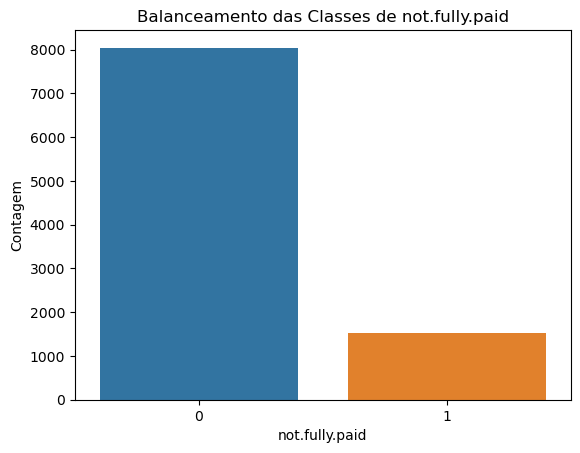

In [5]:
sns.countplot(x = 'not.fully.paid', data = df)
plt.ylabel("Contagem")
plt.title("Balanceamento das Classes de not.fully.paid")
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Temos 14 variáveis, das quais 13 são numéricas e uma (*purpose*) qualitativa. Para as variáveis quantitativas, temos as seguintes medidas:

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


Note que *credit.policy* e *not.fully.paid* são variáveis binárias. Para a variável categórica, *purpose*:

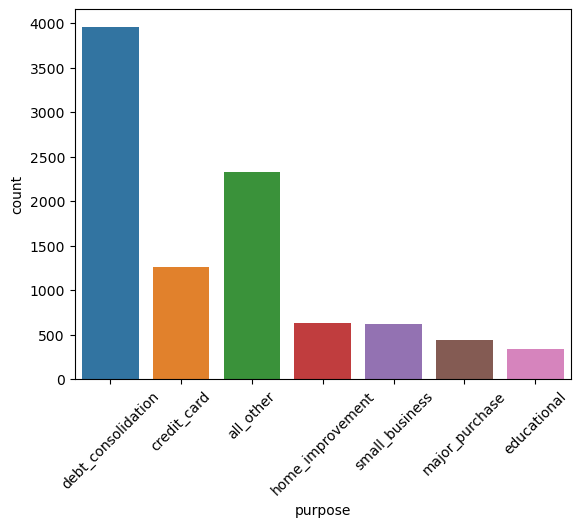

In [8]:
sns.countplot(x = 'purpose', data = df)
plt.xticks(rotation = 45)
plt.show()

Podemos entender a relação entre cada categoria e a variável de interesse:

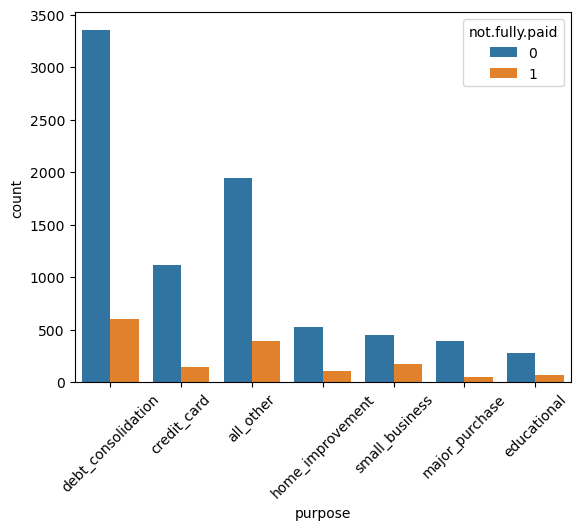

In [9]:
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)
plt.xticks(rotation = 45)
plt.show()

Para as variáveis quantitativas, podemos ver a correlação entre elas:

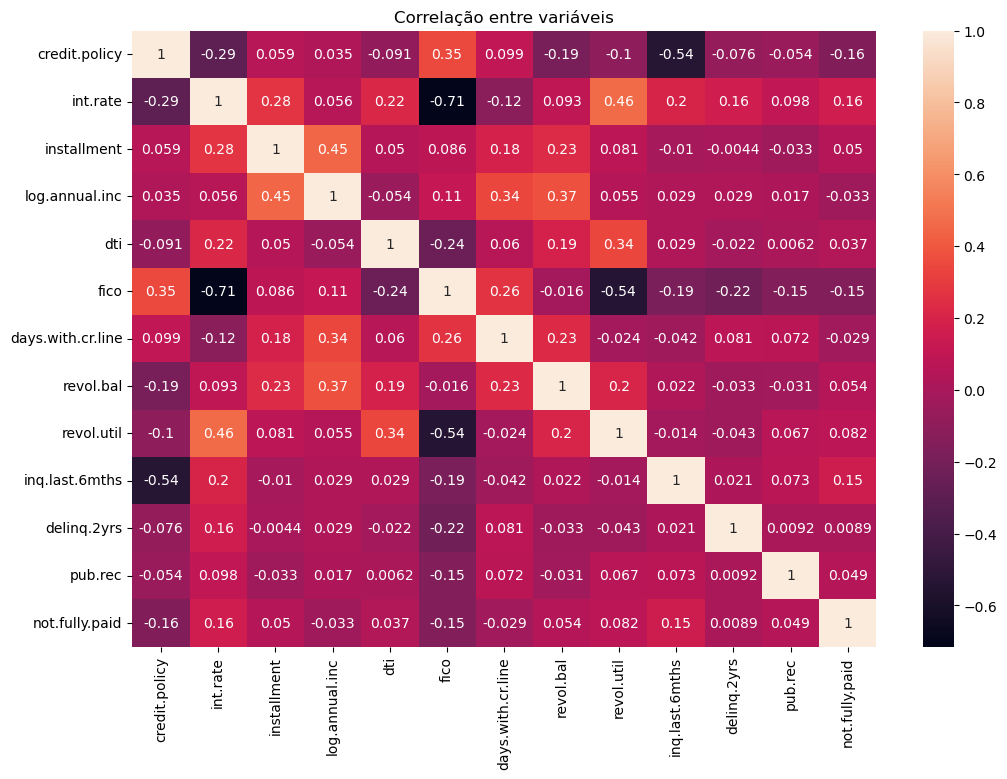

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlação entre variáveis")
plt.show()

Em especial, as correlações para a variável de interesse *not.fully.paid*:

In [11]:
df.corr()['not.fully.paid'].sort_values(ascending = False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

Nenhuma variável tem correlação alta com a variável de interesse, não sendo superiores a |0,16|. Olhando para as quatro variáveis com maior correlação, *int.rate, inq.last.6mths, fico* e *credit.policy*:

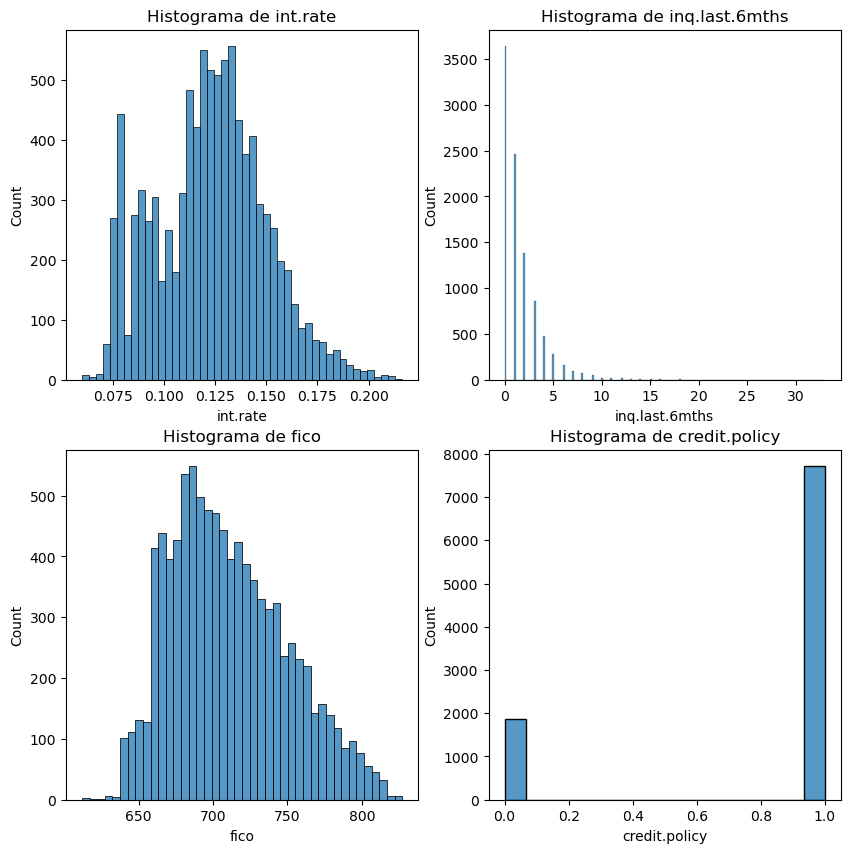

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(df['int.rate'], ax=ax[0,0])
ax[0,0].set_title("Histograma de int.rate")
sns.histplot(df['inq.last.6mths'], ax=ax[0,1])
ax[0,1].set_title("Histograma de inq.last.6mths")
sns.histplot(df['fico'], ax=ax[1,0])
ax[1,0].set_title("Histograma de fico")
sns.histplot(df['credit.policy'], ax=ax[1,1])
ax[1,1].set_title("Histograma de credit.policy")
plt.show()

Olhando o histograma, já temos alguns pontos a serem notados. Como dito anteriormente, *credit.policy* é uma variável binária. A variável *inq.last.6mths* é quantitativa discreta. Assim, para ambas as variáveis, o histograma não trará muita informação, só mostrará como está a distribuição para cada número. Já para *int.rate* e *fico*, o histograma é mais interessante, pois ambas as variáveis parecem ter distribuição assimétrica. Quando olhamos para os boxplots, temos que:

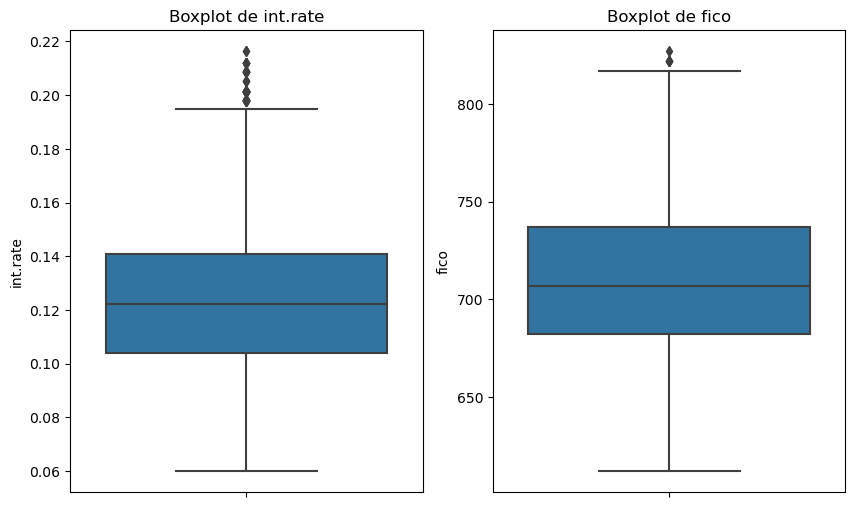

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
sns.boxplot(y=df['int.rate'], ax=ax[0])
ax[0].set_title("Boxplot de int.rate")
sns.boxplot(y=df['fico'], ax=ax[1])
ax[1].set_title("Boxplot de fico")
plt.show()

A relação de assimetria, porém, fica mais difícil de ser identificada pelos boxplots. Temos também da tabela de correlações que *fico* e *int.rate* são o par de variáveis com maior correlação dentro da base. Investigando a relação:

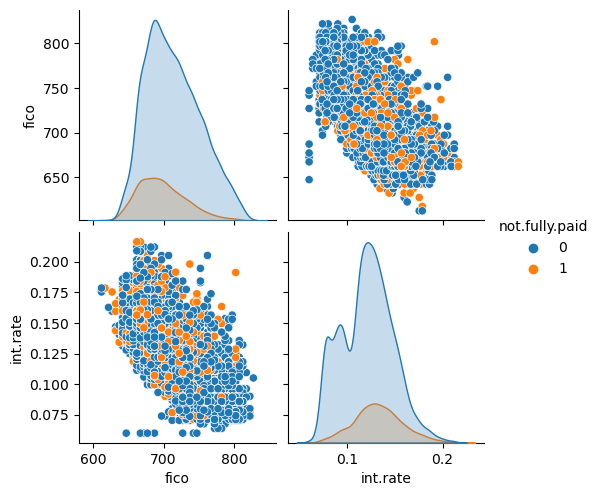

In [14]:
sns.pairplot(df[['fico', 'int.rate', 'not.fully.paid']], hue='not.fully.paid')
plt.show()

As variáveis realmente parecem ter uma relação linear negativa. Além disso, fica evidente a relação vista na tabela de correlações que não pagar todo o empréstimo (*not.fully.paid* = 1) está relacionado com maiores valores de *int.rate* e menores valores de *fico*.

## Feature Engineering

O processo de *feature engineering* é necessário porque consiste em toda a base do trabalho que será feito na base de dados. É importante realizar o tratamento e a preparação dos dados para, aí sim, fazer todas as análises necessárias e obter resultados mais confiáveis e mais rapidamente.

O primeiro tratamento se trata da variável categórica. Realizando o *One Hot Encoding*, isto é, transformando cada categoria da variável *purpose* em uma variável dummy:

In [15]:
# Criando o One Hot Encoding:
purpose = pd.get_dummies(df['purpose'], drop_first=True)

# Removendo a coluna purpose:
df.drop(['purpose'], axis=1, inplace=True)

# Concatenando os valores do encoding ao dataframe:
df = pd.concat([df, purpose], axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   uint8  
 14  debt_consolidation  9578 non-null   uint8  
 15  educational         9578 non-null   uint8  
 16  home_i

O próximo passo é ver se há a necessidade de realizar a normalização de alguma variável. Para tanto, verificamos qual é a amplitude de cada variável:

In [17]:
pd.set_option('float_format', '{:f}'.format)
(df.max() - df.min()).sort_values(ascending = False)

revol.bal            1207359.000000
days.with.cr.line      17460.999997
installment              924.470000
fico                     215.000000
revol.util               119.000000
inq.last.6mths            33.000000
dti                       29.960000
delinq.2yrs               13.000000
log.annual.inc             6.980853
pub.rec                    5.000000
debt_consolidation         1.000000
major_purchase             1.000000
home_improvement           1.000000
educational                1.000000
credit.policy              1.000000
credit_card                1.000000
not.fully.paid             1.000000
small_business             1.000000
int.rate                   0.156400
dtype: float64

A variável *revol.bal* tem uma diferença de 1207359 entre a menor e maior observação, então faz sentido realizar alguma normalização desses dados. Dado que já observamos que *inq.last.6mths* é uma variável discreta, vamos normalizar todas que tiveram uma amplitude maior. São elas: *revol.bal, days.with.cr.line, installment, fico* e *revol.util*.

A normalização feita foi feita pelo *StandardScaler*, onde, para cada variável, cada observação é subtraída pela média e o resultado dividido pelo desvio padrão:

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

A fim de facilitar o código, vamos escrever uma função que realiza os passos necessários para fazer a normalização:

In [19]:
def normalizacao(nomeVar):
    reshapedVals = df[nomeVar].values.reshape(-1, 1)
    scaler.fit(reshapedVals)
    return scaler.transform(reshapedVals)

Com a função preparada, é só aplicar e atribuir a normalização a cada variável:

In [20]:
df["Norm_revol.bar"] = normalizacao("revol.bal")
df["Norm_days.with.cr.line"] = normalizacao("days.with.cr.line")
df["Norm_installment"] = normalizacao("installment")
df["Norm_fico"] = normalizacao("fico")
df["Norm_revol.util"] = normalizacao("revol.util")

Retirando as variáveis originais:

In [21]:
df.drop(['revol.bal', 'days.with.cr.line', 'installment', 'revol.util', 'fico'], axis=1, inplace=True)

E verificando como está a amplitude pós-normalização:

In [22]:
(df.max() - df.min()).sort_values(ascending = False)

Norm_revol.bar           35.768908
inq.last.6mths           33.000000
dti                      29.960000
delinq.2yrs              13.000000
Norm_days.with.cr.line    6.993351
log.annual.inc            6.980853
Norm_fico                 5.662581
pub.rec                   5.000000
Norm_installment          4.464734
Norm_revol.util           4.101623
major_purchase            1.000000
small_business            1.000000
credit.policy             1.000000
home_improvement          1.000000
educational               1.000000
credit_card               1.000000
not.fully.paid            1.000000
debt_consolidation        1.000000
int.rate                  0.156400
dtype: float64

Agora sim, não há nenhuma amplitude com um número muito grande. Seria possível ainda aplicar a normalização para as outras variáveis ou realizar outro tipo de normalização, mas vamos trabalhar com esta base e verificar os resultados.

In [23]:
df.head()

,credit.policy,int.rate,log.annual.inc,dti,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business,Norm_revol.bar,Norm_days.with.cr.line,Norm_installment,Norm_fico,Norm_revol.util
0,1,0.118900,11.350407,19.480000,0,0,0,0,0,1,0,0,0,0,0.353732,0.432230,2.463099,0.688825,0.182704
1,1,0.107100,11.082143,14.290000,0,0,0,0,1,0,0,0,0,0,0.495018,-0.721230,-0.438854,-0.101303,1.030602
2,1,0.135700,10.373491,11.630000,1,0,0,0,0,1,0,0,0,0,-0.397073,0.059770,0.230708,-0.759742,-0.730683
3,1,0.100800,11.350407,8.100000,1,0,0,0,0,1,0,0,0,0,0.496321,-0.745277,-0.757022,0.030385,0.909966
4,1,0.142600,11.299732,14.970000,0,1,0,0,1,0,0,0,0,0,-0.360663,-0.198161,-1.043992,-1.154806,-0.251586


In [24]:
df.to_csv("base_tratada.csv", index=False)

## Algoritmos

Visando o objetivo de "classificar e prever se o devedor pagará ou não o empréstimo na íntegra", as soluções a serem trabalhadas a seguir são:

1. Árvore de Decisão

A primeira solução candidata é a árvore de decisão, que por se tratar de um problema de classificação, é uma solução muito utilizada. É um algoritmo que performa bem, mas que pode apresentar o problema de *overfitting*.

2. Random Forest

A segunda solução explorada é a floresta aleatória. É uma solução que oferece algumas vantagens com relação à arvore de decisão: menor *overfitting*, menor número de hiperparâmetros e é fácil identificar a importância dada a cada componente. Como aspectos negativos, há a lentidão do algoritmo em alguns casos.

___

O primeiro passo é separar os dados em uma base de treino e outra de teste:

In [25]:
from sklearn.model_selection import train_test_split

Como há uma desproporção muito grande entre as categorias da variável de interesse, a opção *stratify* será utilizada, de tal modo a separar a base de treino proporcionalmente de acordo com *not.fully.paid*.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['not.fully.paid'], axis=1), df['not.fully.paid'], test_size=0.30, 
    stratify = df['not.fully.paid'], random_state=2022)

Agora basta instanciar os algoritmos de árvore de deicsão e floresta aleatória:

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(random_state=2022)
dt = DecisionTreeClassifier(random_state=2022)

O *random_state* foi especificado de tal forma a garantir reproducibilidade do código. Por fim, basta aplicar o modelo através do *fit*:

In [29]:
modelo_rf = rf.fit(X_train, y_train)
modelo_dt = dt.fit(X_train, y_train)

Boas métricas para avaliar as soluções são a matriz de confusão e o F1-score. Como queremos classificar bons e maus pagadores, faz sentido utilizar a matriz de confusão e o F1-score traz uma avaliação geral do modelo, uma medida muito útil.

In [30]:
predic_rf = modelo_rf.predict(X_test)
predic_dt = modelo_dt.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Para a árvore de decisão:

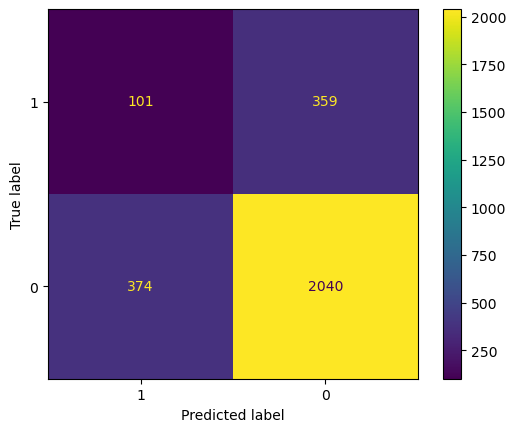

In [32]:
ConfusionMatrixDisplay.from_estimator(modelo_dt, X_test, y_test, labels=[1,0])
plt.show()

In [33]:
print(classification_report(y_test, predic_dt))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2414
           1       0.21      0.22      0.22       460

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



Para a floresta aleatória:

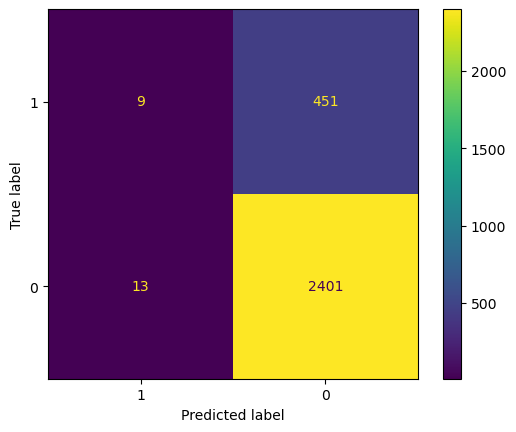

In [34]:
ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, labels=[1,0])
plt.show()

In [35]:
print(classification_report(y_test, predic_rf))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.41      0.02      0.04       460

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874



## Predição

In [36]:
predic_rf = modelo_rf.predict(X_test)
predic_dt = modelo_dt.predict(X_test)

Para a árvore de decisão, as 40 primeiras predições:

In [37]:
predic_dt[0:40]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

Para a floresta aleatória, as 40 primeiras predições:

In [38]:
predic_rf[0:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Analisando a performance pelas métricas apresentadas anteriormente, temos que:

1. Árvore de decisão:

Acertou 116 dos não pagantes (*not.fully.paid* = 1) e errou 344. Dos pagantes, acertou 2041 e errou 373. Ou seja, para os não pagantes, acertou aproximadamente 25%. O modelo teve um F1-score de 0,75. O ideal seria acertar um pouco mais dos não pagantes, mas dependendo da regra de negócio, o modelo até pode ser utilizado.

2. Floresta aleatória

Acertou 11 dos 449 não pagantes. Este número já é alarmante e indica que o modelo não é bom para prever, pois só acertou 2% dos casos. Para os pagantes acertou 2401 e errou 13. Ou seja, para este caso parece haver um *overfitting*. O F1-score foi de 0,84, muito pelo desempenho dos casos dos pagantes, que é muito discrepante.

## Importância das Features

In [39]:
colunas = df.columns[1:19]

Importância das componentes para árvore de decisão:

In [40]:
import_dt = pd.DataFrame.from_dict(dict(zip(colunas, modelo_dt.feature_importances_)), 
                                   orient='index', columns = ['importancia'])
import_dt.sort_values(['importancia'], ascending=False).head(10)

,importancia
Norm_revol.util,0.132832
Norm_installment,0.127794
Norm_days.with.cr.line,0.122869
inq.last.6mths,0.109856
dti,0.107771
log.annual.inc,0.103631
Norm_revol.bar,0.091993
Norm_fico,0.080087
delinq.2yrs,0.032658
int.rate,0.021684


Importância das componentes para floresta aleatória:

In [41]:
import_rf = pd.DataFrame.from_dict(dict(zip(colunas, modelo_rf.feature_importances_)), 
                                   orient='index', columns = ['importancia'])
import_rf.sort_values(['importancia'], ascending=False).head(10)

,importancia
Norm_installment,0.116289
Norm_revol.bar,0.112456
dti,0.112123
Norm_days.with.cr.line,0.111697
Norm_revol.util,0.111055
inq.last.6mths,0.110365
log.annual.inc,0.104884
Norm_fico,0.079926
delinq.2yrs,0.053859
pub.rec,0.014876


## Análise de Cluster

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [43]:
kmeans = KMeans(n_clusters = 2, random_state = 2022)

In [44]:
kmeans.fit(df)

KMeans(n_clusters=2, random_state=2022)

In [45]:
pd.DataFrame(kmeans.labels_, columns = ['Label'])['Label'].value_counts()

1    4849
0    4729
Name: Label, dtype: int64

Para dois clusters, o valor do método da silhueta:

In [46]:
preds = kmeans.predict(df)
silhouette_score(df, preds)

0.4587419393848633

Variando o número de cluster, temos que:

K = 2 silhouette_score: 0.4587
K = 3 silhouette_score: 0.3581
K = 4 silhouette_score: 0.2928
K = 5 silhouette_score: 0.2985
K = 6 silhouette_score: 0.2407
K = 7 silhouette_score: 0.1982
K = 8 silhouette_score: 0.2035
K = 9 silhouette_score: 0.2064
K = 10 silhouette_score: 0.2062


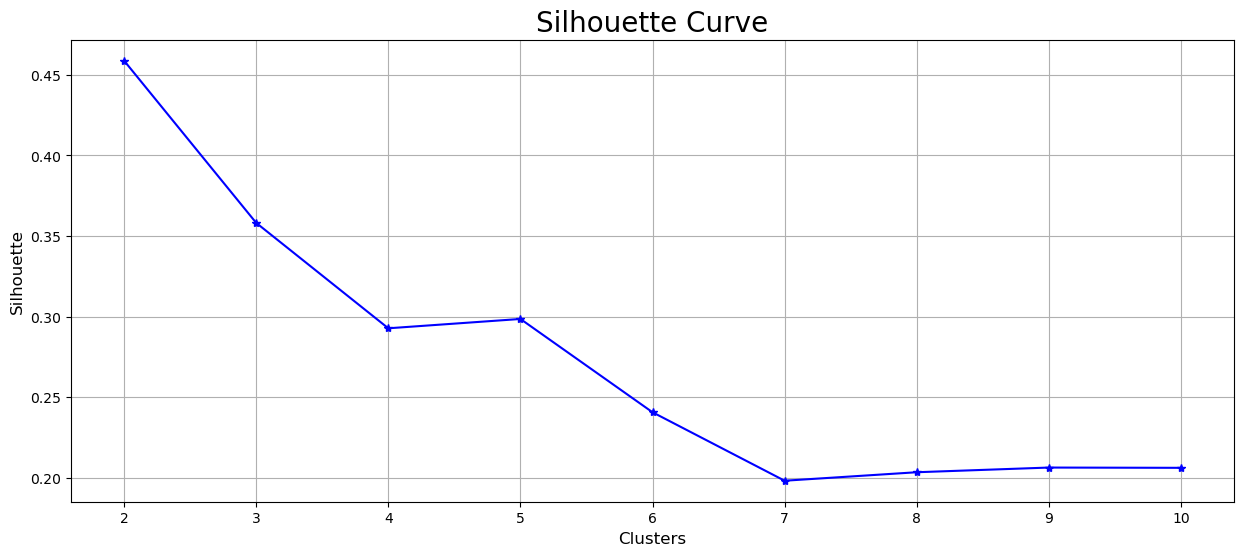

In [47]:
sil = []
for k in range(2, 11):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(df)
    sil_score = silhouette_score(df, kmeans_.predict(df))
    print('K =', k,  'silhouette_score:', round(sil_score, 4))
    sil.append(sil_score)

cluster = np.arange(2, 11)
sil = np.array(sil)

plt.figure(figsize = (15, 6))
plt.plot(cluster, sil, 'b*-')

plt.title("Silhouette Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Silhouette", fontsize = 12)

plt.xticks(cluster)
plt.grid()

plt.show()

Comparando os números do método da silhueta para diferentes K, temos os melhores resultados com dois clusters. Podemos investigar também o método da curva do cotovelo:

In [48]:
from scipy.spatial.distance import cdist

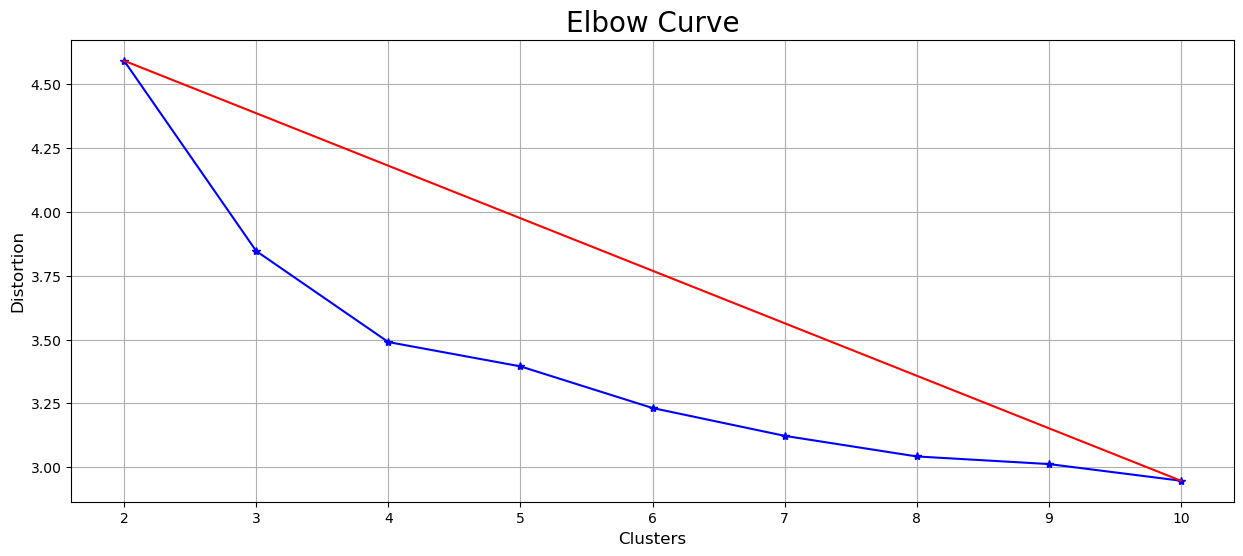

In [49]:
distortions = []
for k in range(2, 11):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(df)
    distortions.append(
        sum(np.min(
                    cdist(df, kmeans_.cluster_centers_, 'euclidean'), axis=1)
                           ) 
                / df.shape[0]
    )
    
cluster = np.arange(2, 11)
distortions = np.array(distortions)

plt.figure(figsize = (15, 6))
plt.plot(cluster, distortions, 'b*-')
plt.plot(np.array([cluster[0], cluster[-1]]), np.array([distortions[0], distortions[-1]]), color = 'r')

plt.title("Elbow Curve", fontsize = 20)
plt.xlabel("Clusters", fontsize = 12)
plt.ylabel("Distortion", fontsize = 12)
plt.xticks(cluster)
plt.grid()

plt.show()

Pelo método da curva do cotovelo, aparentemente quatro clusters vão ter melhores resultados. Olhando para o método da silhueta, a diferença entre os resultados para quatro e dois clusters são muito diferentes.

Como para este trabalho foram consideradas todas as variáveis, seria mais interessante tentar aplicar algum método de dimensionalidade como a análise de componentes principais antes de realizar a análise pelo KNN. Isso ajudaria no desempenho do algoritmo e também facilitaria na visualização dos resultados, como em um gráfico de radar. Outra solução seria ter utilizado apenas algumas variáveis para estarem presentes no modelo.